# COURSE: Generate and visualize data in Python and MATLAB

## SECTION: Time series noise

### https://www.udemy.com/course/suv-data-mxc/?couponCode=201910

### INSTRUCTOR: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import hilbert
from scipy import interpolate


---
# VIDEO: Normal and uniform noise
---


In [2]:
# simulation details for this video
srate  = 100 # sampling rate in Hz
time   = np.arange(-1,2,1/srate)
pnts   = len(time)

hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)-1))


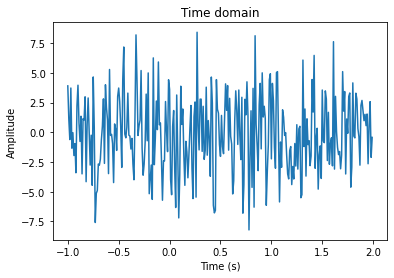

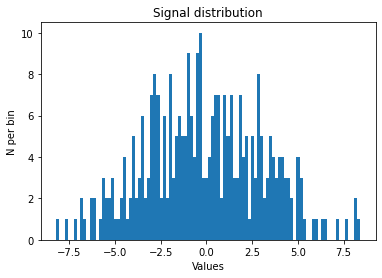

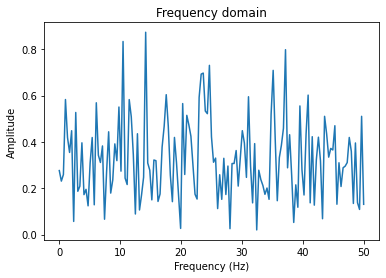

In [3]:
## normally distrbuted noise

# parameters
a = 3;
b = 0;

# optional fix the rng
# np.random.seed(3)

# generate noise time series
noise = a*np.random.randn(len(time)) + b



## plotting
plt.plot(time,noise)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# show distribution
plt.hist( np.hstack(noise),100 )
plt.title('Signal distribution')
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.show()

# compute amplitude spectrum
amp = 2*abs(scipy.fftpack.fft(noise)/pnts)
plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


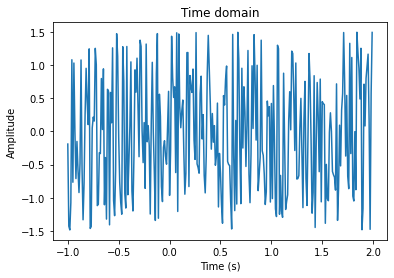

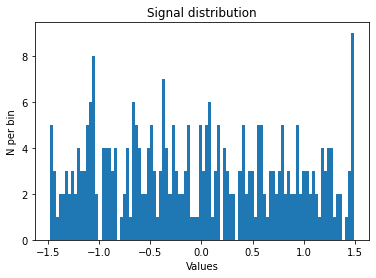

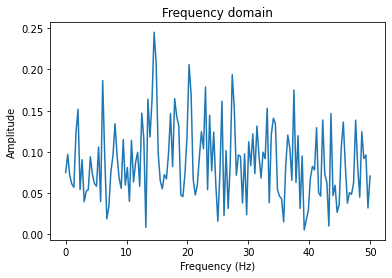

In [4]:
## uniform-distrbuted noise

# parameters
a = 3
b = 0

noise = a*np.random.rand(len(time)) + b-a/2



## plotting
plt.plot(time,noise)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# show distribution
plt.hist( np.hstack(noise),100 )
plt.title('Signal distribution')
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.show()

# compute amplitude spectrum
amp = 2*abs(scipy.fftpack.fft(noise)/pnts)
plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()



---
# VIDEO: Pink noise (aka 1/f aka fractal)
---


In [5]:
# simulation details for this video

srate  = 100 # sampling rate in Hz
time   = np.arange(-1,2,1/srate)
pnts   = len(time)

hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)-1))


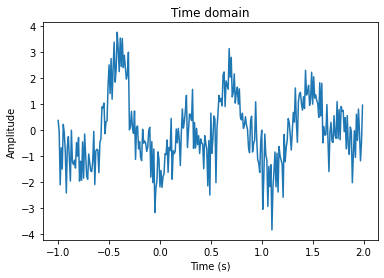

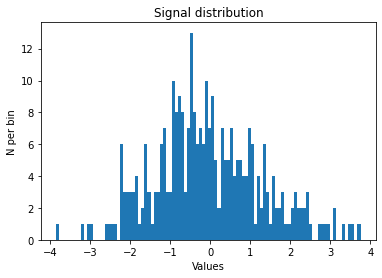

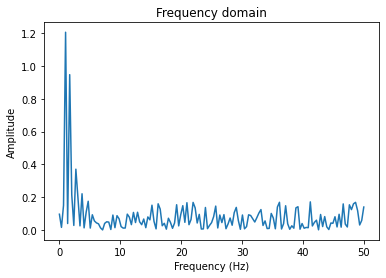

In [6]:
## Pink noise, method 1

# exponential decay parameter
ed = 5

# 1/f amplitude spectrum
asi = np.multiply( np.random.rand(int(np.floor(pnts/2)-1)) , .1+np.exp(-np.arange(0,int(np.floor(pnts/2)-1))/ed) )
asi = np.concatenate( (np.asarray([asi[0]]),asi,np.asarray([0]),asi[::-1]),axis=0 )

# Fourier coefficients
fc = np.multiply( asi , np.exp(1j*2*np.pi*np.random.rand(len(asi))) )

# inverse Fourier transform to create the noise
noise = np.real(scipy.fftpack.ifft(fc)) * pnts



## plotting
plt.plot(time,noise)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# show distribution
plt.hist( np.hstack(noise),100 )
plt.title('Signal distribution')
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.show()

# compute amplitude spectrum
amp = 2*abs(scipy.fftpack.fft(noise)/pnts)
plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


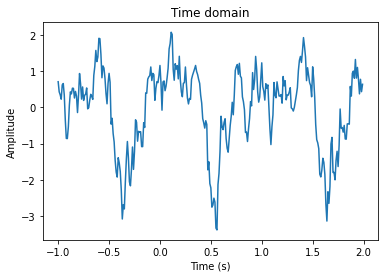

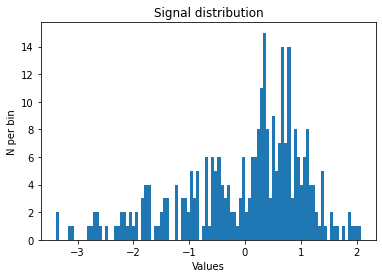

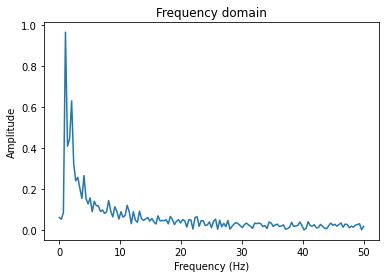

In [7]:
## Pink noise, method 2

# frequencies to simulate
frex  = np.linspace(1,150,300)

noise = np.zeros(len(time))

for fi in range(0,len(frex)):
    
    # amplitude (1/f^c)
    amp = 1/frex[fi]**1
    
    # create new component and add to the mix
    noise = noise + amp*np.sin(2*np.pi*frex[fi]*time + np.random.rand(1)*2*np.pi)



## plotting
plt.plot(time,noise)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# show distribution
plt.hist( np.hstack(noise),100 )
plt.title('Signal distribution')
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.show()

# compute amplitude spectrum
amp = 2*abs(scipy.fftpack.fft(noise)/pnts)
plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()



---
# VIDEO: Brownian (aka random walk)
---


In [8]:
# simulation details for this video

srate  = 100 # sampling rate in Hz
time   = np.arange(-1,2,1/srate)
pnts   = len(time)

hz = np.linspace(0,srate/2,int(np.floor(len(time)/2)-1))


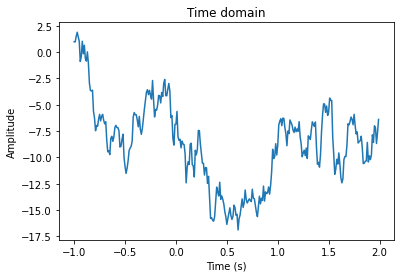

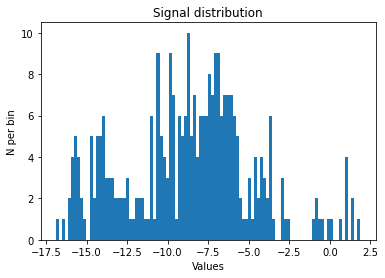

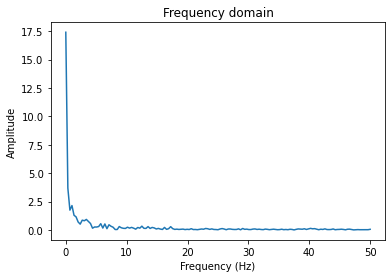

In [9]:
## Brownian

rnoise = np.random.randn(len(time))
noise  = np.cumsum( rnoise )


## plotting
plt.plot(time,noise)
plt.title('Time domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# show distribution
plt.hist( np.hstack(noise),100 )
plt.title('Signal distribution')
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.show()

# compute amplitude spectrum
amp = 2*abs(scipy.fftpack.fft(noise)/pnts)
plt.plot(hz,amp[0:len(hz)])
plt.title('Frequency domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()



---
# VIDEO: Multivariate correlated noise
---


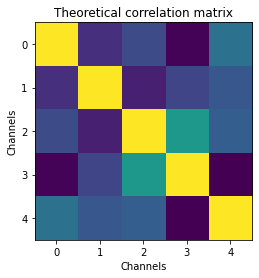

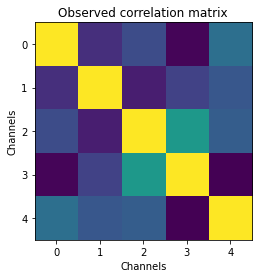

In [10]:
# simulation details
nchannels = 5
npnts     = 10000

# correlation matrix (positive-def symmetric by auto-multiplication)
cormat = np.random.randn(nchannels,nchannels)
cormat = cormat@cormat.T

# normalize and force autocorrelations to 1
cormat = cormat / cormat.max()

for i in range(0,nchannels):
    cormat[i,i] = 1


# eigendecomposition of correlation matrix
evals,evecs = np.linalg.eig(cormat)
evals = np.diag(evals)

# simulate correlated data by imposing eigenvectors
part1 = np.dot( evecs,scipy.linalg.sqrtm(evals) )
data  = np.dot( part1,np.random.randn(nchannels,npnts) )

# observed correlation matrix
obscormat = np.corrcoef(data)

# make an image of the theoretical correlation matrix
plt.imshow(cormat)
plt.title('Theoretical correlation matrix')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.colorbar
plt.show()

# and an image of the sampled correlation matrix
plt.imshow(obscormat)
plt.title('Observed correlation matrix')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.colorbar
plt.show()